In [1]:
import datetime
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from matplotlib import cm
%matplotlib inline

In [48]:
data = {'age_group': ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'],
        'surv': [ 20, 21, 60, 70, 55, 22, 20, 20, 18],
       'deaths': [0, 0, 1, 2, 1, 2, 3, 4, 4],
       'surv_r': [100.0, 100.0, 90.9, 90.9, 93.8, 85.7, 76.9, 71.4, 66.7],
       'dth_r': [0.0, 0.0, 9.1, 9.1, 6.2, 14.3, 23.1, 28.6, 33.3]}
df = pd.DataFrame(data)
df

,age_group,surv,deaths,surv_r,dth_r
0,0-9,20,0,100.0,0.0
1,10-19,21,0,100.0,0.0
2,20-29,60,1,90.9,9.1
3,30-39,70,2,90.9,9.1
4,40-49,55,1,93.8,6.2
5,50-59,22,2,85.7,14.3
6,60-69,20,3,76.9,23.1
7,70-79,20,4,71.4,28.6
8,80+,18,4,66.7,33.3


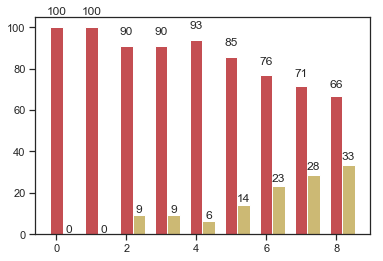

In [45]:
N = 9 ##number of bars
survi = df['surv_r'] ## survivals

ind = np.arange(N) ## x location for the group bars
width = 0.35 ## width of bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, survi, width, color='r', label='surv') ## survivals plot

deaths = df['dth_r'] ## deaths
rects2 = ax.bar(ind + width, deaths, width, color='y', label='deaths') ## deaths plot

# ax.set_xticklabels(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']);


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05 * height,
               '%d' % int(height),
               ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

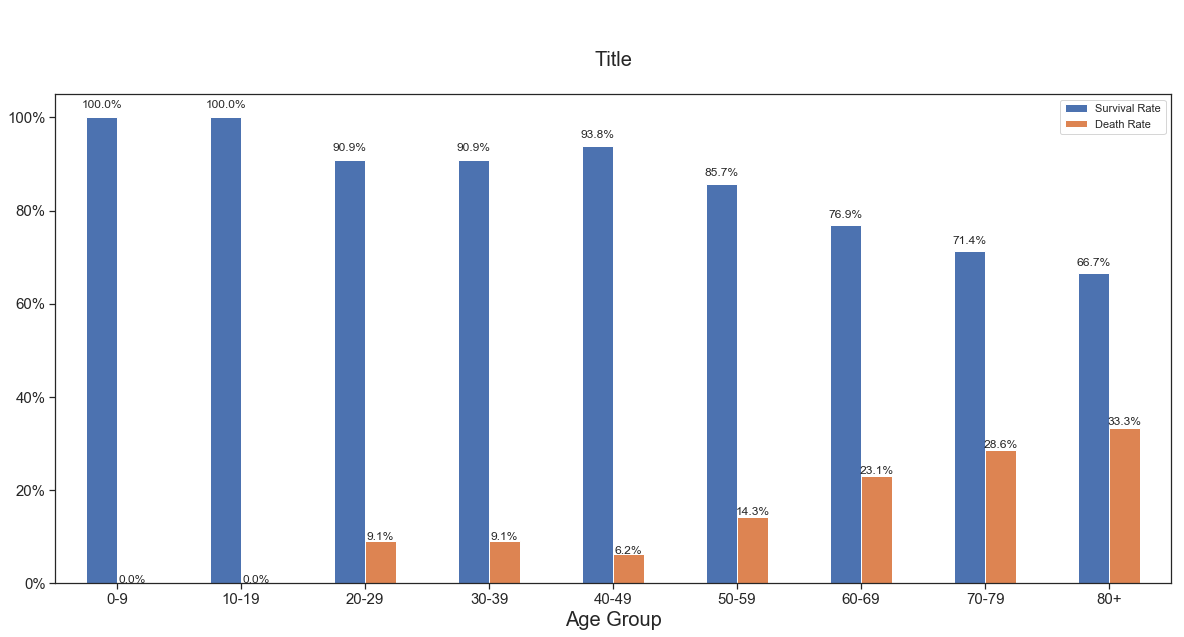

In [51]:
## another way to plot
ax = df.plot(x='age_group', y=['surv_r', 'dth_r'],
                kind='bar',
                figsize=(20,9),
                rot=0,
                fontsize=15)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center')
    
ax.set_title('\n\nTitle\n', fontsize =20)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xticklabels(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']);
ax.set_xlabel('Age Group', fontsize=20)
ax.legend(['Survival Rate', 'Death Rate']);

In [33]:
## plott with seaborn

# sns.set(style="ticks", color_codes=True)
# iris = sns.load_dataset("iris")
# iris.head()
# iris.dtypes
# g = sns.pairplot(iris)

# plt.show()